## Sensor Fusion - Multiple Sensor Data Fusion - Gaussian Prior

A brief bayesian overview of multiple sensor data fusion, we aim to calculate the reliablility of sensors when fusing data together for a system

NB: Notes taken from Murphy's PML 2023 - April

- Detail Mathematical Proof 



### Definition Multivariate Gaussian Distribution 

The Multivariate Normal Probability Density function reads as the following:

$$\mathcal{N}(\mathbf{y|\mathbf{\mathbb{E}[y]};\Sigma}):=\frac{1}{(2\pi)^{D/2}\sqrt{\det\mathbf{\Sigma}}}\exp\left[-\frac{1}{2}(\mathbf{y-\mathbf{\mathbb{E}[y]}})^{T}\mathbf{\Sigma^{-1}}(\mathbf{y-\mathbf{\mathbb{E}[y]})}\right]$$

where we have $\mathbf{\Sigma}=\mathrm{cov[\mathbf{\mathit{Y_{i}Y_{j}}}]}$ such that $\mathbf{y\in\mathbb{R}^{\mathit{D}}},\mathbf{y}\sim\mathcal{N}\left(\mathbb{E}[\mathbf{y}],\mathbf{\Sigma}\right)$ and for any subset of data sampled from the real numbers $\left\{ Y_{1},Y_{2},...,Y_{D}\right\} \subseteq\mathbb{R} $ then we can form a vector $\mathbf{y}$ which corresponds to each one of these values in $\left\{ Y_{1},Y_{2},...,Y_{D}\right\}$ for which we call it a d-dimenional random vector. The variance - covariance matrix reads as 

$$\mathbf{\Sigma}=\left(\begin{array}{cccc}
\mathbb{V}[Y_{1}] & \mathrm{cov[\mathit{Y_{1}Y_{2}}]} & \cdots & \mathrm{cov[\mathit{Y_{1}Y_{D}}]}\\
\mathrm{cov[\mathit{Y_{2}Y_{1}}]} & \mathbb{V}[Y_{2}] & \mathrm{\cdots} & \mathrm{cov[\mathit{Y_{2}Y_{D}}]}\\
\vdots & \vdots & \ddots & \vdots\\
\mathrm{cov[\mathit{Y_{D}Y_{1}}]} & \mathrm{cov[\mathit{Y_{D}Y_{2}}]} & \cdots & \mathbb{V}[Y_{D}]
\end{array}\right)$$

**N.B** the variance is on the diagonal since $i = j$ at these points, and ,therefore, in the case of a normal distribution can be replaced with variance $\sigma$. When i.i.d assumptions are enforced then we duly replace the variance-covariance matrix with $\mathbf{\Sigma} = \sigma \mathbf{I_{D}}\in M_{D \times D}(\mathbb{R})$, however, note that this assumption can be too restrictive for most applications. 

### Marginals and Conditionals for the Multivariate Gaussian Distribution - useful soon!

Here we have two output vectors $\mathbf{y_{1}}$ and $\mathbf{y_{2}}$ which are jointly Gaussian with mean and variance-covariance matrices as follows such that $\mathbf{\Sigma^{-1}}$ is called the Precision matrix thus we define the marginals for our distributions as follows 


Here we are using a two dimensional representation of the MVG distribution with the following representations for each variable. The variance-covariance matrix and it's inverse (the Partition/Prescision matrix) are block matrices
$$
\mathbb{E}[\mathbf{y}]=\left(\begin{array}{c}
\mathbb{E}[\mathbf{y_{1}}]\\
\mathbb{E}[\mathbf{y_{2}}]
\end{array}\right),\mathbf{\Sigma}=\left(\begin{array}{cc}
\mathbf{\Sigma_{11}} & \mathbf{\Sigma_{12}}\\
\mathbf{\Sigma_{21}} & \mathbf{\Sigma_{22}}
\end{array}\right),\mathbf{\Lambda=\Sigma^{-1}=\mathbf{\mathbf{\left(\begin{array}{cc}
\mathbf{\Lambda_{11}} & \mathbf{\Lambda_{12}}\\
\mathbf{\Lambda_{21}} & \mathbf{\Lambda_{22}}
\end{array}\right)}}}$$

Where the marginals are given by the following 

$$\mathbb{P}\left(\mathbf{y_{1}}\right)=\mathcal{N}\left(\mathbf{y_{1}}|\mathbb{E}[\mathbf{y_{1}}],\mathbf{\Sigma_{11}}\right)$$

$$\mathbb{P}\left(\mathbf{y_{2}}\right)=\mathcal{N}\left(\mathbf{y_{2}}|\mathbb{E}[\mathbf{y_{2}}],\mathbf{\Sigma_{22}}\right)$$

With the expected values for each random vector and the diagonal entries of our variance-covariance matrix.

We can form a posterior distribution on our distributions as the following conditional probability distribution, from an application of Bayes Rule for conditional probabilities we have

$$\mathbb{P}\left(\mathbf{y_{1}|y_{2}}\right)=\mathcal{N}\left(\mathbf{y_{1}}|\mathbf{\mathbb{E}[y_{1}|y_{2}],\Sigma_{1|2}}\right)$$

Where:

$$\mathbb{E}[\mathbf{y_{1}|y_{2}}]=\mathbb{E}[\mathbf{y_{1}}]+\mathbf{\Sigma_{12}\Sigma_{22}^{-1}(y_{2}-\mathbb{E}[y_{2}])}$$

$$=\mathbb{E}[\mathbf{y_{1}}]-\mathbf{\Lambda_{11}^{-1}\Lambda_{12}\left(y_{2}-\mathbb{E}[y_{2}]\right)}$$

and, which is computed using the Schur compliment (inverse of block matrix):

$$\mathbf{\Sigma_{1|2}=\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}=\Lambda_{11}^{-1}}$$

Therefore, we can use the definition of $\mathbf{\Sigma_{1|2}=\Lambda_{11}^{-1}}$ in the definition of the conditional expectation, for now we have 

$$\mathbb{E}[\mathbf{y_{1}|y_{2}}]\mathbf{=}\mathbf{\Sigma_{1|2}\left(\Lambda_{11}\mathbb{E}[y_{1}]-\Lambda_{12}\left(y_{2}-\mathbb{E}[y_{2}]\right)\right)}$$

*Proof: see https://statproofbook.github.io/P/mvn-cond.html* 

## Infering an unknown vector

In this scenario, we are considering a random vector, denoted as $z \in \mathbb{R}^D$. We lack any prior knowledge or specific information about this vector, including its characteristics or underlying distribution. Consequently, we are unable to derive a posterior distribution, which would typically be obtained by updating a prior distribution with observed data. As a result, we cannot determine the variances or covariances associated with this unknown vector.

However, despite the lack of a priori knowledge about $z$, we can still utilize a Gaussian prior on the data. It's important to clarify that in this context, the term 'a priori' refers to the knowledge gained from experience or observation. By assuming a Gaussian prior distribution for the data, we introduce certain initial beliefs or assumptions about its statistical properties before incorporating any specific observed data points.

In this specific scenario, let's assume that we have a lack of prior knowledge about the vector $z$. However, we can still utilize a diffuse prior distribution, which reflects high uncertainty and minimal assumptions about $z$. One common choice is to consider a multivariate Gaussian prior with a large covariance matrix that accounts for the uncertainty. To achieve this, we can set the diagonal elements of the covariance matrix $\mathbf{\Sigma}$ to large values, such as $\mathbf{\Sigma} = \lambda\mathbf{I_D}$, where $\lambda$ represents a large constant and $\mathbf{I_D}$ is the identity matrix of dimension $D$. This diffuse prior allows us to express our lack of knowledge about the specific statistical properties of $z$ while acknowledging the high uncertainty associated with it.

Take $\mathbb{P}(z) = \mathcal{N}\left(\mathbb{E}[\mathbf{y_{z}}],\mathbf{\Sigma_{z}}\right)$, if do not know how uncertain we are about the system we can equally assume we know nothing about the expected value, meaning we can assume the mean is zero, that is $\mathbb{E}[\mathbf{y_{z}}] = \mathbf{0}$ thus our assumption is symmetric.

Suppose we take $N$ noisy i.i.d measurment vectors ,endowed with a Gaussian, of $z$ such that $\mathbf{y_{n}} \sim \mathcal{N}\left(\mathbf{z},\mathbf{\Sigma_{z}}\right)$ such that $\mathbf{y_{\mathit{n}}}\in\mathbb{R^{\mathit{D}}}$. We show that the likeihood function is a single Gaussian evaluated at the average of the observations, provided the scale factor is $\frac{1}{N}$. That is to say 

$$\mathbb{P}\left(\mathcal{D}|\mathbf{z}\right)=\prod_{n=1}^{N}\mathcal{N}\left(\mathbf{y_{n}|z,\Sigma_{y}}\right)\propto\mathcal{N}\left(\mathbf{\bar{y}|z},\frac{1}{N}\mathbf{\Sigma_{y}}\right)$$

where, 
$$\prod_{n=1}^{N}\mathcal{N}\left(\mathbf{y_{n}|z,\Sigma_{y}}\right)=\left(\frac{1}{(2\pi)^{D/2}\sqrt{\det\mathbf{\Sigma}}}\right)^{N}\exp\left[-\frac{1}{2}\sum_{n=1}^{N}(\mathbf{y_{n}-\mathbf{\mathbb{E}[y_{n}]}})^{T}\mathbf{\Sigma^{-1}}(\mathbf{y_{n}-\mathbf{\mathbb{E}[y_{n}]})}\right]$$

As usual with prodcuts, we take the logarithm to make them easier to deal with, using the power rule for logarithms the log of a product returns the sum of the logarithms. 

$$\log\left(\mathbb{P}\left(\mathcal{D}|\mathbf{z}\right)\right)=\sum_{n=1}^{N}\log\left(\mathcal{N}\left(\mathbf{y_{n}|z,\Sigma_{y}}\right)\right)\propto\log\left(\mathcal{N}\left(\mathbf{\bar{y}|z},\frac{1}{N}\mathbf{\Sigma_{y}}\right)\right)$$

In our example we define $$\mathbb{P}\left(\mathcal{D}|\mathbf{z}\right)=\mathbb{P}\left(\mathbf{y_{1}|z}\right)\mathbb{P}\left(\mathbf{y_{2}|z}\right)$$
So let's use it!

$$\log\left(\mathbb{P}\left(\mathbf{y_{1}|z}\right)\mathbb{P}\left(\mathbf{y_{2}|z}\right)\right)$$

Let $N = 2$ giving $$\left(\frac{1}{(2\pi)^{D/2}\sqrt{\det\mathbf{\Sigma}}}\right)^{N}\exp\left[-\frac{1}{2}\sum_{n=1}^{N}(\mathbf{y-\mathbf{z}})^{T}\mathbf{\Sigma^{-1}}(\mathbf{y-\mathbf{z})}\right]$$
Taking the logarithm gives
$$\left(\frac{1}{(2\pi)^{D/2}\sqrt{\det\mathbf{\Sigma}}}\right)^{2}\exp\left[-\frac{1}{2}(\mathbf{y_{1}-\mathbf{z}})^{T}\mathbf{\Sigma^{-1}}(\mathbf{y_{1}-\mathbf{z})}-\frac{1}{2}(\mathbf{y_{2}-\mathbf{z}})^{T}\mathbf{\Sigma^{-1}}(\mathbf{y_{2}-\mathbf{z})}\right]$$
letting the constant at the from be some variable, say $A\in \mathbb{R}$ then we have
$$A-\frac{1}{2}(\mathbf{y_{1}-\mathbf{z}})^{T}\mathbf{\Sigma^{-1}}(\mathbf{y_{1}-\mathbf{z})}-\frac{1}{2}(\mathbf{y_{2}-\mathbf{z}})^{T}\mathbf{\Sigma^{-1}}(\mathbf{y_{2}-\mathbf{z})}$$
Now expanding the terms on the right and simplifying as follows

$$A-\frac{1}{2}(\mathbf{y_{1}-\mathbf{z}})^{T}\left(\mathbf{\Sigma^{-1}}\mathbf{y_{1}-\mathbf{\mathbf{\Sigma^{-1}}z}}\right)-\frac{1}{2}(\mathbf{y_{2}-\mathbf{z}})^{T}\left(\mathbf{\Sigma^{-1}}\mathbf{y_{2}}-\mathbf{\Sigma^{-1}}\mathbf{z}\right)$$

$$=A-\mathbf{\frac{1}{2}\left(z^{T}\Sigma^{-1}z-2z^{T}\Sigma^{-1}y_{1}\right)-\frac{1}{2}\left(z^{T}\Sigma^{-1}z-2z^{T}\Sigma^{-1}y_{2}\right)}$$

$$=A-\mathbf{\frac{1}{2}\left(2z^{T}\Sigma^{-1}z-2z^{T}\Sigma^{-1}(y_{1}+y_{2})\right)}$$

$$=A-\mathbf{\frac{1}{2}\left(2z^{T}\Sigma^{-1}z-4z^{T}\Sigma^{-1}{\bar{\mathbf{y}}}\right)}$$

$$=A+\log\mathcal{N}\left(\mathbf{z}|\mathbf{\bar{y}},\frac{\mathbf{\Sigma}}{2}\right)$$
Note here that $\bar{\mathbf{y}}$ is the usual expected value for $\mathbf{y}$


## Data Fusion 

Now that we have the necessary tools, we can expand our concept of inferring random vectors to estimate the reliability of sensors. This will be crucial before we delve into the Kalman Filter in subsequent examples, as it will allow an observer to understand the performance of their sensors and provide a better explanation of the data received from these sensors, rather than making assumptions based on a random process.

Suppose that we have two sensors making measurments of the same object where both of the sensors have different reliabilities. In general, if we have $M$ sensors that make a total of $N_{m}$ measurments, where, $m$ represents a particular sensor, we can form a vector $\mathbf{y}\in\mathbb{R^{\mathit{N}}}$ such that $$\mathbf{y} = \mathbf{y}_{1:N, 1:M}$$ which says that the vector $\mathbf{y}$ contains all data running up to the total number of measurments $1\leq n\leq N$ for a particular sensor $1\leq m\leq M$ for any $n,N,m,M\in\mathbb{N}$

Moving back to our two-sensor example. We can endow a Gaussian prior on each vector $\mathbf{y_{1}}$ and $\mathbf{y_{2}}$ to compute the singular posterior distribution $\mathbb{P}(\mathbf{z}|\mathbf{y})$ to give a more complete picture about the system reliability as a whole. Note above we showed that for any two Gaussian distributions we can represent the entire system in a single posterior while knowing nothing about the vector $\mathbf{z}$, given that we can assume the system data is Gaussian.

Let our two sensors be endowed with gaussian priors such that $$\mathbf{y_{1}} \sim \mathcal{N}(\mathbf{z,\Sigma_{1}})$$ $$\mathbf{y_{2}} \sim \mathcal{N}(\mathbf{z,\Sigma_{2}})$$

We aim to find a random vector $z$ such that our model is represented by $z$ where $$z \rightarrow [\mathbf{y_{1}, y_{2}}]$$ which tell's us that through Gaussian conditioning formulae we can invert the arrow in the generative model from latent variables to observations.

We represent this system in the linear gaussian setting, this means we have a model

$$\mathbb{P}\left(\mathbf{z,y}\right) = \mathbb{P}(\mathbf{z})\mathbb{P}(\mathbf{y|z})$$

which is equal to

$$\mathbb{P}\left(\mathbf{z,y}\right)=\mathbb{P}\left(\mathbf{z}\right)\prod_{m=1}^{M}\prod_{n=1}^{N_{m}}\mathcal{N}\left(\mathbf{y_{\mathit{n,m}}|z,\Sigma_{\mathit{m}}}\right)$$

we can represent the posterior distribution using the knowledge above as a normal distribution with matrix $\mathbf{W}\in\mathbb{R^{\mathit{N \times M}}}$ such that $$\mathbb{P}(\mathbf{y|z}) = \mathcal{N}(\mathbf{y|Wz, \Sigma})$$ where $\mathbf{W = I}$ and $$\Sigma=\left(\begin{array}{cc}
\mathbf{\Sigma_{1}} & \mathbf{0}\\
\mathbf{0} & \mathbf{\Sigma_{2}}
\end{array}\right)$$

The posterior latent is given by 

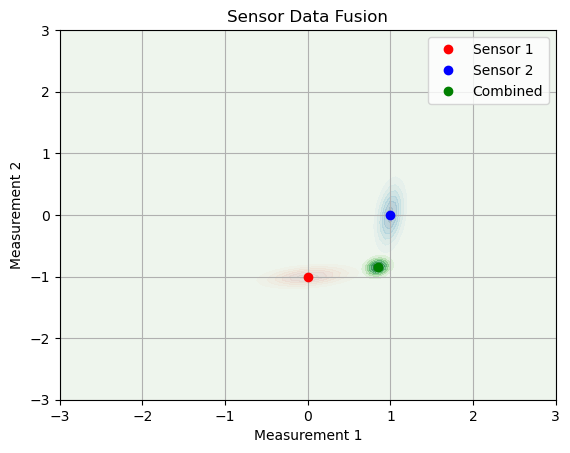

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def sensor_data_fusion(sensor1_mean, sensor1_covariance, sensor2_mean, sensor2_covariance):
    inv_cov1 = np.linalg.inv(sensor1_covariance)
    inv_cov2 = np.linalg.inv(sensor2_covariance)
    
    combined_covariance = np.linalg.inv(inv_cov1 + inv_cov2)
    combined_mean = combined_covariance @ (inv_cov1 @ sensor1_mean + inv_cov2 @ sensor2_mean)
    
    return combined_mean, combined_covariance

# Define the mean and covariance matrix for sensor 1
sensor1_mean = np.array([0, -1])
sensor1_covariance = np.array([[0.01*10, 0.01*1], [0.01*1, 0.01*1]])

# Define the mean and covariance matrix for sensor 2
sensor2_mean = np.array([1, 0])
sensor2_covariance = np.array([[0.01*1, 0.01*1], [0.01*1, 0.01*10]])

combined_mean, combined_covariance = sensor_data_fusion(sensor1_mean, sensor1_covariance, sensor2_mean, sensor2_covariance)

# Generate grid points for contour plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Calculate the individual multivariate Gaussian distributions
distribution1 = multivariate_normal(sensor1_mean, sensor1_covariance)
Z1 = distribution1.pdf(pos)

distribution2 = multivariate_normal(sensor2_mean, sensor2_covariance)
Z2 = distribution2.pdf(pos)

# Calculate the combined multivariate Gaussian distribution
combined_distribution = multivariate_normal(combined_mean, combined_covariance)
Z_combined = combined_distribution.pdf(pos)

# Set custom line styles
line_styles = ['-', '--', '-.']

# Plot the individual distributions and the combined distribution
plt.figure()

plt.contourf(X, Y, Z1, cmap='Reds', alpha=0.6, linestyles=line_styles[0], extent=[x.min(), x.max(), y.min(), y.max()])
plt.plot(*sensor1_mean, 'ro', label='Sensor 1')

plt.contourf(X, Y, Z2, cmap='Blues', alpha=0.6, linestyles=line_styles[1], extent=[x.min(), x.max(), y.min(), y.max()])
plt.plot(*sensor2_mean, 'bo', label='Sensor 2')

plt.contourf(X, Y, Z_combined, cmap='Greens', alpha=0.6, linestyles=line_styles[2], extent=[x.min(), x.max(), y.min(), y.max()])
plt.plot(*combined_mean, 'go', label='Combined')

plt.title('Sensor Data Fusion')
plt.xlabel('Measurement 1')
plt.ylabel('Measurement 2')
plt.legend()
plt.grid(True)
plt.show()
